In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('data/data.csv')
data = data[data.shot_made_flag.notnull()].reset_index()

In [4]:
def calculate_shot_accuracy(feature):
    results = pd.crosstab(data.shot_made_flag, data[feature]).apply(
        lambda x: x/x.sum(), axis=0)
    columns = np.array(results.columns)
    values = results.values[1:]*100
    return columns, values[0]

def plot_shot_accuracy(x, y, xlabel):
    ax = sns.barplot(x, y)
    ax.set(xlabel=xlabel, ylabel='Shot Accuracy (%)')
    plt.show()

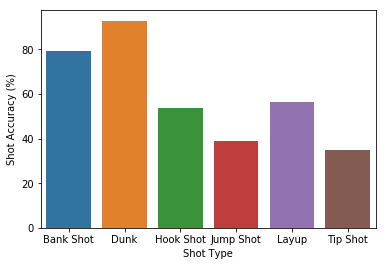

In [5]:
shot_type, accuracy = calculate_shot_accuracy('combined_shot_type')
plot_shot_accuracy(shot_type, accuracy, 'Shot Type')

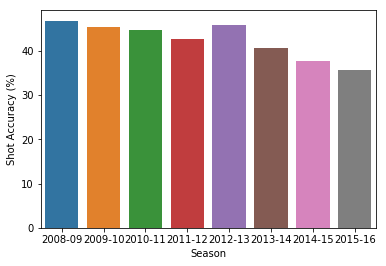

In [6]:
season, accuracy = calculate_shot_accuracy('season')
season = season[-8:]
accuracy = accuracy[-8:]
plot_shot_accuracy(season, accuracy, 'Season')

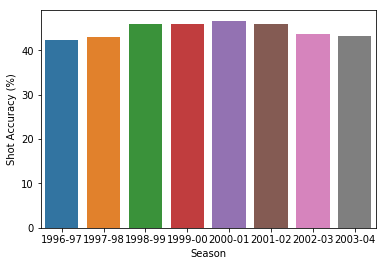

In [7]:
season, accuracy = calculate_shot_accuracy('season')
season = season[:8]
accuracy = accuracy[:8]
plot_shot_accuracy(season, accuracy, 'Season')

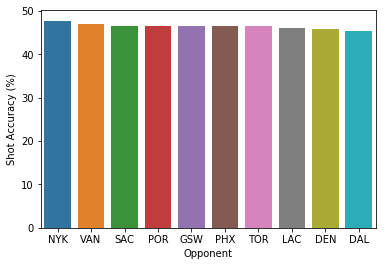

In [8]:
opponents, accuracy = calculate_shot_accuracy('opponent')
opp, acc = zip(*sorted(list(zip(opponents, accuracy)),
                       key=lambda x: x[1], reverse=True)[:10])
plot_shot_accuracy(list(opp), list(acc), 'Opponent')

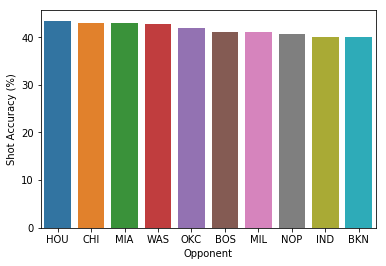

In [9]:
opponents, accuracy = calculate_shot_accuracy('opponent')
opp, acc = zip(*sorted(list(zip(opponents, accuracy)),
                       key=lambda x: x[1], reverse=True)[-10:])
plot_shot_accuracy(list(opp), list(acc), 'Opponent')

In [61]:
sorted_games = data.copy()
sorted_games = sorted_games.sort_values(['game_date', 'period', 'seconds_remaining'], ascending=[
                                True, True, False]).reset_index(drop=True)

In [62]:
def different_period(row):
    if row.previous_game_date != row.game_date or row.previous_period != row.period:
        return 0
    return row.made_previous_flag

In [63]:
sorted_games['made_previous_flag'] = sorted_games['shot_made_flag'].shift(1).fillna(value=0)
sorted_games['previous_period'] = sorted_games['period'].shift(1).fillna(value=0)
sorted_games['previous_game_date'] = sorted_games['game_date'].shift(1).fillna(value=0)
sorted_games['made_previous_flag'] = sorted_games.apply(different_period, axis=1)
sorted_games.drop(columns=['previous_period', 'previous_game_date'])

,index,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,...,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,made_previous_flag
0,22901,Jump Shot,Jump Shot,102,29600027,33.9283,-140,116,-118.4098,0,...,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,1996-11-03,LAL vs. MIN,MIN,22902,0.0
1,22902,Jump Shot,Jump Shot,127,29600031,33.9473,-131,97,-118.4008,10,...,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,1996-11-05,LAL @ NYK,NYK,22903,0.0
2,22903,Jump Shot,Jump Shot,124,29600044,33.8633,-142,181,-118.4118,8,...,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,1996-11-06,LAL @ CHH,CHA,22904,0.0
3,22904,Jump Shot,Jump Shot,144,29600044,34.0443,0,0,-118.2698,6,...,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,1996-11-06,LAL @ CHH,CHA,22905,1.0
4,22905,Jump Shot,Jump Shot,151,29600044,33.9063,-10,138,-118.2798,5,...,Center(C),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,1996-11-06,LAL @ CHH,CHA,22906,0.0
5,22907,Jump Shot,Jump Shot,226,29600057,33.8213,-64,223,-118.3338,2,...,Center(C),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,1996-11-08,LAL @ TOR,TOR,22908,0.0
6,22909,Jump Shot,Jump Shot,334,29600057,33.8673,-79,177,-118.3488,1,...,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,1996-11-08,LAL @ TOR,TOR,22910,0.0
7,22910,Jump Shot,Jump Shot,337,29600057,33.8373,-103,207,-118.3728,1,...,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,1996-11-08,LAL @ TOR,TOR,22911,0.0
8,22911,Driving Layup Shot,Layup,352,29600057,34.0443,0,0,-118.2698,0,...,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,1996-11-08,LAL @ TOR,TOR,22912,1.0
9,22913,Driving Layup Shot,Layup,384,29600057,34.0443,0,0,-118.2698,8,...,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,1996-11-08,LAL @ TOR,TOR,22914,0.0


In [67]:
sorted_games.head(10)[['shot_made_flag', 'made_previous_flag', 'period', 'game_date']]

,shot_made_flag,made_previous_flag,period,game_date
0,0.0,0.0,1,1996-11-03
1,0.0,0.0,2,1996-11-05
2,1.0,0.0,2,1996-11-06
3,0.0,1.0,2,1996-11-06
4,1.0,0.0,2,1996-11-06
5,1.0,0.0,2,1996-11-08
6,0.0,0.0,3,1996-11-08
7,1.0,0.0,3,1996-11-08
8,0.0,1.0,3,1996-11-08
9,0.0,0.0,4,1996-11-08


In [69]:
result = sorted_games.groupby(['made_previous_flag','shot_zone_area'], as_index=False).count()

In [70]:
result

,made_previous_flag,shot_zone_area,index,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,...,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,previous_period,previous_game_date
0,0.0,Back Court(BC),38,38,38,38,38,38,38,38,...,38,38,38,38,38,38,38,38,38,38
1,0.0,Center(C),7443,7443,7443,7443,7443,7443,7443,7443,...,7443,7443,7443,7443,7443,7443,7443,7443,7443,7443
2,0.0,Left Side Center(LC),2168,2168,2168,2168,2168,2168,2168,2168,...,2168,2168,2168,2168,2168,2168,2168,2168,2168,2168
3,0.0,Left Side(L),2018,2018,2018,2018,2018,2018,2018,2018,...,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018
4,0.0,Right Side Center(RC),2506,2506,2506,2506,2506,2506,2506,2506,...,2506,2506,2506,2506,2506,2506,2506,2506,2506,2506
5,0.0,Right Side(R),2464,2464,2464,2464,2464,2464,2464,2464,...,2464,2464,2464,2464,2464,2464,2464,2464,2464,2464
6,1.0,Back Court(BC),34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
7,1.0,Center(C),3846,3846,3846,3846,3846,3846,3846,3846,...,3846,3846,3846,3846,3846,3846,3846,3846,3846,3846
8,1.0,Left Side Center(LC),1196,1196,1196,1196,1196,1196,1196,1196,...,1196,1196,1196,1196,1196,1196,1196,1196,1196,1196
9,1.0,Left Side(L),1114,1114,1114,1114,1114,1114,1114,1114,...,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114
